<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Adding-attributes-on-creation" data-toc-modified-id="Adding-attributes-on-creation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Adding attributes on creation</a></span></li><li><span><a href="#Adding-attributes-post-hypergraph-creation" data-toc-modified-id="Adding-attributes-post-hypergraph-creation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adding attributes post hypergraph creation</a></span></li></ul></div>

In [28]:
#importing and installing packages
%pip install hypernetx 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import hypernetx as hnx
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
#set plotting parameters
TextSize = 15

# Adding attributes on creation

An attributed hypergraph can be constructed from creation using many common data structures for representing hypergraphs. To name a few you can use:
* Dictionary of dictionaries
* Dictionary of iterables
* List of lists
* Pandas Dataframe

HNX will automatically detect the datastructure used and create the hypergraph object. 

We will now do a demo using the dictionary object that represents a set of 4 meetings involving 6 people with topics discussed by individuals during meetings as incidences attributes and intervals representing when meetings occured. Details on this example are provided in https://arxiv.org/abs/2405.04559.

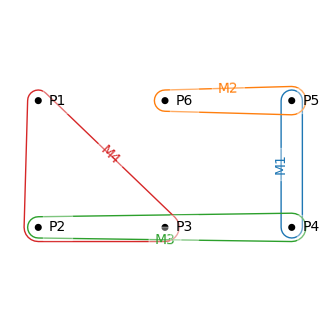

In [7]:
#node as people and hyperedges as meetings with topic and interval attributes.

NS = 'P' # P = Person
ES = 'M' # M = Meeting

HG = {
       ES+'1': {NS+'4': {'topics': ['A', 'B']}, 
                NS+'5': {'topics': ['A', 'C']}},
       
       ES+'2': {NS+'5':{'topics':['E', 'F']}, 
                NS+'6':{'topics':['F']}},
    
       ES+'3': {NS+'2':{'topics':['C', 'D']}, 
                NS+'3':{'topics':['B', 'C', 'D']}, 
                NS+'4':{'topics':['D']}},
    
       ES+'4': {NS+'1': {'topics':['C']}, 
                NS+'2': {'topics':['C']}, 
                NS+'3': {'topics':['C']}}
      }

edge_attributes = {
       ES+'1': {'interval': [0, 1]},
       ES+'2': {'interval': [2, 6]},
       ES+'3': {'interval': [3, 5]},
       ES+'4': {'interval': [7, 9]},
        }

node_attributes = {
       NS+'1': {'color': 'blue'},
       NS+'2': {'color': 'red'},
       NS+'3': {'color': 'green'},
        }


H = hnx.Hypergraph(HG, edge_properties = edge_attributes, node_properties = node_attributes)

HG_pos = {
         NS+'1': (0.0, 0.5),
         NS+'2': (0.0, 0.0),
         NS+'3': (0.5, 0.0),
         NS+'4': (1.0, 0.0),
         NS+'5': (1.0, 0.5),
         NS+'6': (0.5, 0.5)}

plt.figure(figsize = (4,4))
hnx.draw(H, pos = HG_pos)
plt.show()

In [11]:
#Accessing edges dataframe for hyperedge properties
H.edges.dataframe

,weight,misc_properties
uid,,
M1,1,"{'interval': [0, 1]}"
M2,1,"{'interval': [2, 6]}"
M3,1,"{'interval': [3, 5]}"
M4,1,"{'interval': [7, 9]}"


In [12]:
#Accessing nodes dataframe for node properties
H.nodes.dataframe

,weight,misc_properties
uid,,
P1,1,{'color': 'blue'}
P2,1,{'color': 'red'}
P3,1,{'color': 'green'}


In [13]:
#Accessing incidence dataframe for incidence properties
H.incidences.dataframe

weight              misc_properties
edges nodes                                     
M1    P4          1       {'topics': ['A', 'B']}
      P5          1       {'topics': ['A', 'C']}
M2    P5          1       {'topics': ['E', 'F']}
      P6          1            {'topics': ['F']}
M3    P2          1       {'topics': ['C', 'D']}
      P3          1  {'topics': ['B', 'C', 'D']}
      P4          1            {'topics': ['D']}
M4    P1          1            {'topics': ['C']}
      P2          1            {'topics': ['C']}
      P3          1            {'topics': ['C']}

In [16]:
#Accessing the attributes directly
incidence = ('M1', 'P4') #choose, for example, an incidence
H.incidences[incidence].topics #grab the topics attribute on that incidence

['A', 'B']

In [17]:
H.get_properties(incidence, level = 2) #grab all properties for that incidence. Level = 2 is for incidences

{'topics': ['A', 'B'], 'weight': 1}

In [19]:
H.incidences[incidence].properties #alternative use the properties key to grab all properties

{'topics': ['A', 'B'], 'weight': 1}

In [20]:
H.edges['M1'].interval #another example for edges grabbing the interval property

[0, 1]

# Adding attributes post hypergraph creation 

Similar to NetworkX, we can also construct hypergraphs from "scratch" by starting with an empty hypergraph and adding incidences/hyperedges/nodes as well as attributes on them.

Here we again create the same hypergraph as before modeling the meetings, but building it up from an empty hypergraph

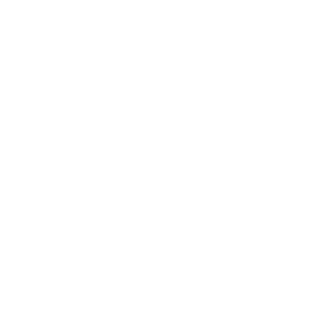

,,weight,misc_properties
edges,nodes,,


In [22]:
#starting with an empty hyperhraph
HG = {}
H = hnx.Hypergraph(HG)

plt.figure(figsize = (4,4))
hnx.draw(H, pos = HG_pos)
plt.show()

#empty incidence store
H.incidences.dataframe

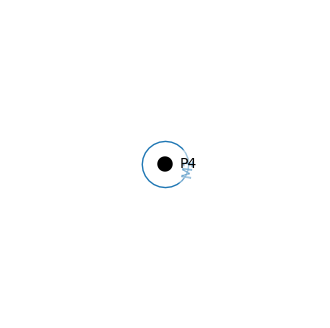

,,weight,misc_properties
edges,nodes,,
M1,P4,2.0,"{'topics': {'A', 'B'}}"


In [23]:
#add a single incidence with attributes
H.add_incidence('M1', 'P4', weight = 2, topics = {'B', 'A'})

plt.figure(figsize = (4,4))
hnx.draw(H, pos = HG_pos)
plt.show()
H.incidences.dataframe

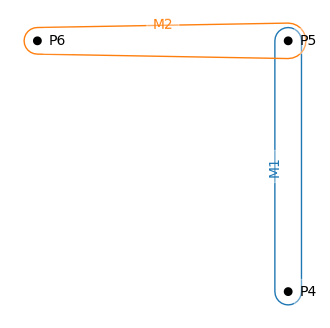

weight         misc_properties
edges nodes                                
M1    P4        2.0  {'topics': {'A', 'B'}}
      P5        1.0  {'topics': {'C', 'B'}}
M2    P5        1.0                      {}
      P6        1.0                      {}

In [24]:
#addinging multiple incidences and then setting attributes after
H.add_incidences_from([('M1', 'P5'), ('M2', 'P5'), ('M2', 'P6')])
H.incidences[('M1', 'P5')].topics = {'B', 'C'}

plt.figure(figsize = (4,4))
hnx.draw(H, pos = HG_pos)
plt.show()
H.incidences.dataframe

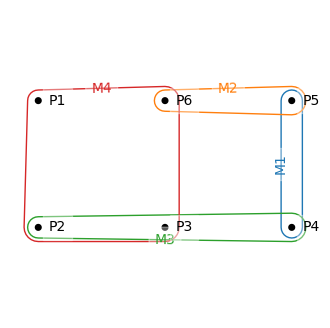

weight              misc_properties
edges nodes                                     
M1    P4        2.0       {'topics': {'A', 'B'}}
      P5        1.0       {'topics': {'C', 'B'}}
M2    P5        1.0                           {}
      P6        1.0                           {}
M3    P2        1.0       {'topics': ['C', 'D']}
      P3        1.0  {'topics': ['B', 'C', 'D']}
      P4        1.0            {'topics': ['D']}
M4    P1        1.0            {'topics': ['C']}
      P2        1.0            {'topics': ['C']}
      P3        1.0            {'topics': ['C']}
      P6        1.0                           {}

In [25]:
#adding hyperedges and nodes using a dictionary.
H.add_nodes_to_edges(    {'M3': {'P2':{'topics':['C', 'D']}, 
                                 'P3':{'topics':['B', 'C', 'D']}, 
                                 'P4':{'topics':['D']}},
                          'M4': {'P1': {'topics':['C']}, 
                                 'P2': {'topics':['C']}, 
                                 'P3': {'topics':['C']},
                                 'P6': {}}})
plt.figure(figsize = (4,4))
hnx.draw(H, pos = HG_pos)
plt.show()
H.incidences.dataframe

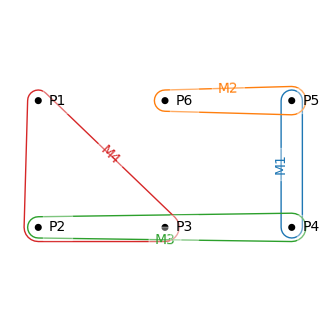

weight              misc_properties
edges nodes                                     
M1    P4        2.0       {'topics': {'A', 'B'}}
      P5        1.0       {'topics': {'C', 'B'}}
M2    P5        1.0                           {}
      P6        1.0                           {}
M3    P2        1.0       {'topics': ['C', 'D']}
      P3        1.0  {'topics': ['B', 'C', 'D']}
      P4        1.0            {'topics': ['D']}
M4    P1        1.0            {'topics': ['C']}
      P2        1.0            {'topics': ['C']}
      P3        1.0            {'topics': ['C']}

In [26]:
#removing an incidence apir. This can also be done for edges and nodes.
H = H.remove_incidences(('M4', 'P6'))

plt.figure(figsize = (4,4))
hnx.draw(H, pos = HG_pos)
plt.show()
H.incidences.dataframe

In [27]:
#again setting attributes to edges (can be done for nodes as well).
H.edges['M1'].interval = [0,1]
H.edges.dataframe

,weight,misc_properties
uid,,
M1,1,"{'interval': [0, 1]}"
